In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
%matplotlib inline

In [24]:
mentions = pd.read_csv('data/trump_tv_mentions.csv')
mentions['Date'] = pd.to_datetime(mentions.Date)
mentions.set_index('Date', inplace = True)
mentions.head()

,Trump Mentions
Date,
2015-06-14,23
2015-06-15,14
2015-06-16,925
2015-06-17,934
2015-06-18,508


In [26]:
search = pd.read_csv('data/primary_search_interest.csv')
search['Week'] = pd.to_datetime(search.Week)
search.set_index('Week', inplace = True)
search.columns = ['Trump', 'Bush', 'Rubio', 'Cruz', 'Carson']
search['percent'] = search.Trump/(search.Trump + search.Bush + search.Rubio + search.Cruz + search.Carson)
search.head()

,Trump,Bush,Rubio,Cruz,Carson,percent
Week,,,,,,
2015-06-14,25,9,1,1,1,0.675676
2015-06-21,15,2,1,1,1,0.750000
2015-06-28,32,2,1,2,1,0.842105
2015-07-05,21,3,1,1,1,0.777778
2015-07-12,33,2,1,1,1,0.868421


In [25]:
polling = pd.read_csv('data/rcp_average.csv')
polling['StartDate'] = pd.to_datetime(polling.StartDate)
polling['EndDate'] = pd.to_datetime(polling.EndDate)
polling['Trump_percent'] = polling.Trump/100
polling.head()

,Poll,StartDate,EndDate,Sample,Trump,Cruz,Rubio,Carson,Kasich,Spread,Trump_percent
0,CNN/ORC,2016-02-24,2016-02-27,427 RV,49,15,16,10,6,Trump +33,0.49
1,IBD/TIPP,2016-02-19,2016-02-24,400 RV,31,20,18,8,7,Trump +11,0.31
2,Rasmussen Reports,2016-02-21,2016-02-22,697 LV,36,17,21,8,12,Trump +15,0.36
3,FOX News,2016-02-15,2016-02-17,404 LV,36,19,15,9,8,Trump +17,0.36
4,NBC News/Wall St. Jrnl,2016-02-14,2016-02-16,400 LV,26,28,17,10,11,Cruz +2,0.26


In [5]:
weekly_mentions = mentions.resample('7D', how = sum)

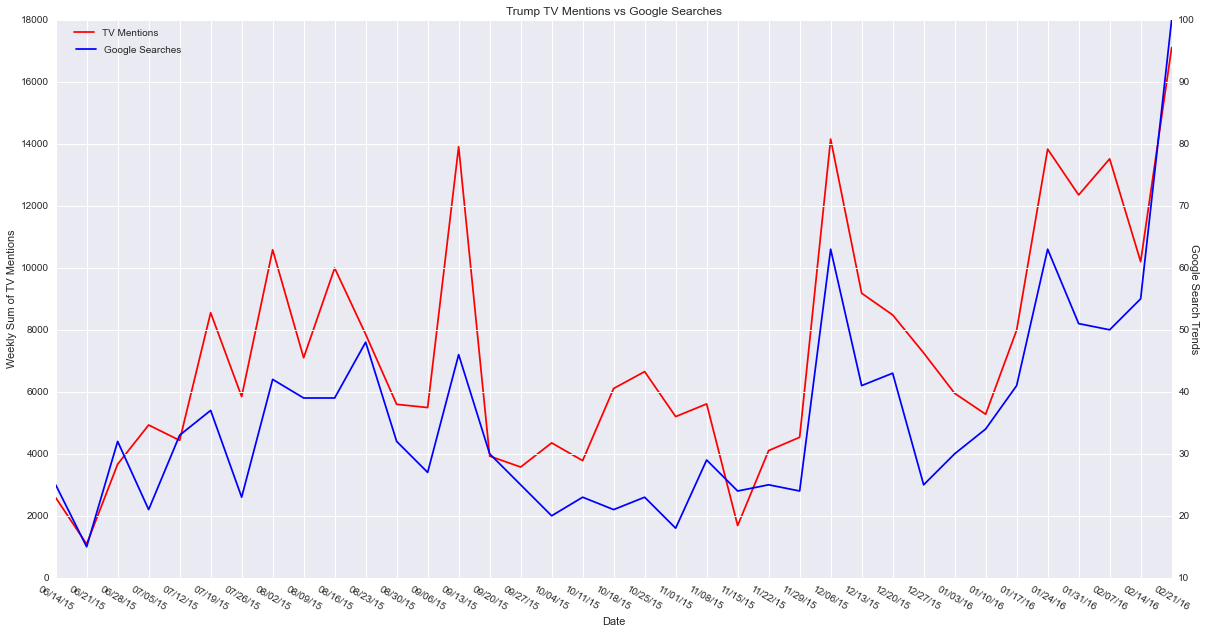

In [6]:
plt.figure(figsize=(20,10))
plt.plot(weekly_mentions.index[:-1], weekly_mentions['Trump Mentions'][:-1], label = 'TV Mentions', color = 'r')
plt.xticks(rotation=-30)
plt.ylabel('Weekly Sum of TV Mentions')
plt.xlabel('Date')
plt.xticks(weekly_mentions.index, weekly_mentions.index.strftime('%m/%d/%y'))
plt.legend(bbox_to_anchor=(0.1, 1))
plt.twinx()
plt.plot(search.index, search.Trump, color = 'b', label = 'Google Searches')
plt.title('Trump TV Mentions vs Google Searches')
plt.ylabel('Google Search Trends', rotation = 270)
plt.legend(bbox_to_anchor=(0.12, .97))

In [7]:
def count(x):
    return(mentions[polling.loc[x]['StartDate']:polling.loc[x]['EndDate']].sum()[0])

In [8]:
m = []
for i in range(0, 82):
    m.append(count(i))

In [9]:
polling['Mentions'] = m

In [10]:
polling.cov()

,Trump,Cruz,Rubio,Carson,Kasich,Trump_percent,Mentions
Trump,59.338904,30.571665,10.392954,-6.240289,3.417194,0.593389,8473.728395
Cruz,30.571665,40.638512,17.905149,-13.738934,3.563836,0.305717,6640.543210
Rubio,10.392954,17.905149,17.825956,-1.754592,3.852153,0.103930,3726.493827
Carson,-6.240289,-13.738934,-1.754592,42.495032,-2.508883,-0.062403,-4029.654321
Kasich,3.417194,3.563836,3.852153,-2.508883,4.922764,0.034172,1673.456790
Trump_percent,0.593389,0.305717,0.103930,-0.062403,0.034172,0.005934,84.737284
Mentions,8473.728395,6640.543210,3726.493827,-4029.654321,1673.456790,84.737284,6265539.654321


In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(polling['Mentions']/1000, 
                                                               polling['Trump_percent'])

In [13]:
slope, r_value ** 2

(0.013524339262968159, 0.19313059395917642)

In [14]:
intercept

0.21983468447864385

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


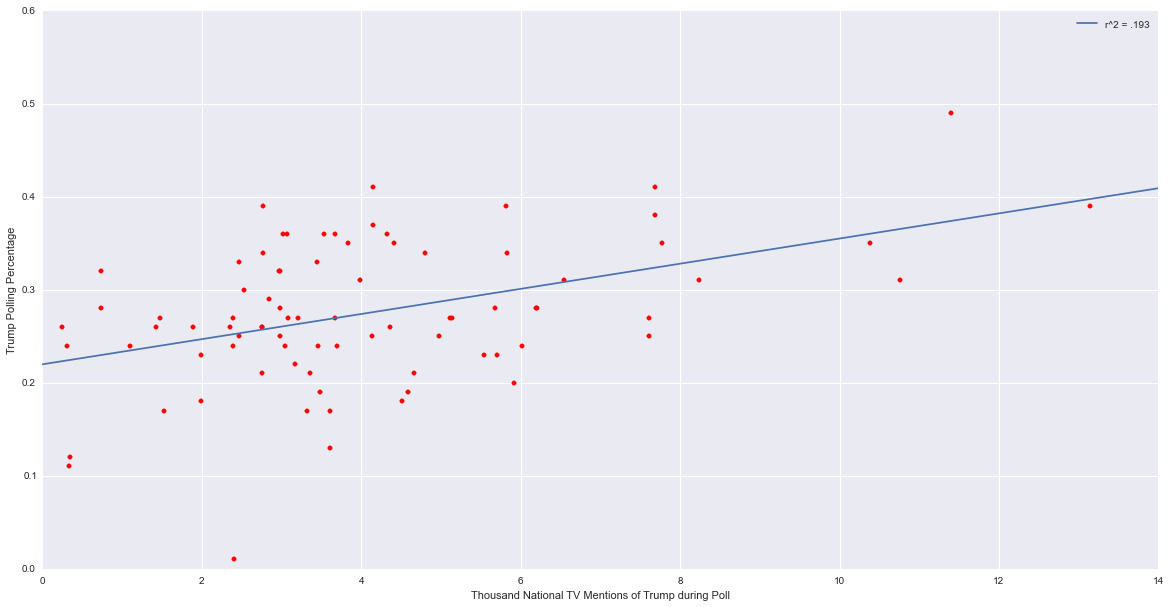

In [21]:
plt.figure(figsize=(20,10))
plt.xlim(0, 14)
plt.ylim(0, .6)
plt.ylabel('Trump Polling Percentage')
plt.xlabel('Thousand National TV Mentions of Trump during Poll')
plt.scatter(polling['Mentions']/1000, polling['Trump_percent'], color = 'r')
x = range(0,15)
y = slope * x + intercept
plt.plot(x, y, label = 'r^2 = .193')
plt.legend()